Boolean Equation is:
(not (((x1 or x2) xnor (x2 and x3)) xor ((x3 nand x4) nor (x2 and x3))))


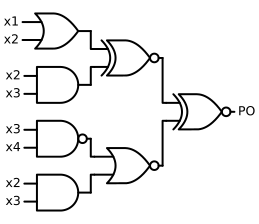

In [6]:
def parse_netlist(netlist):
    gates = {}
    fanout_values = {}  # Dictionary to store fanout values for later use
    for line in netlist.split('\n')[1:]:
        if line.strip():  # Skip empty lines
            parts = line.split()
            gate_num = int(parts[0])
            gate_conn = parts[1]
            gate_type = parts[2]
            fanout = int(parts[3])
            fanin = int(parts[4])
            fanin1 = int(parts[5]) if parts[5] != '-' else None
            fanin2 = int(parts[6]) if parts[6] != '-' else None
            if gate_conn == 'fan':
                fanout_values[gate_num] = fanout  # Store fanout value for later use
            
            gates[gate_num] = {'type': gate_type, 'fanout': fanout, 'fanin': fanin, 'fanin1': fanin1, 'fanin2': fanin2}
    
    # Update fanin1 and fanin2 values based on fanout values
    for gate_num, gate in gates.items():
        if gate['type'] != 'from':  # Only update non-'from' gates
            if gate['fanin1'] in fanout_values or gate['fanin2'] in fanout_values:
                if gate['fanin1'] in fanout_values:
                    gates[gate_num]['fanin1'] = fanout_values[gate['fanin1']]
                if gate['fanin2'] in fanout_values:
                    gates[gate_num]['fanin2'] = fanout_values[gate['fanin2']]

    # print(gates)
    return gates


def generate_boolean_equation(gates):
    def get_boolean_expression(gate_num):
        gate = gates[gate_num]
        if gate['type'] == 'inpt':
            return f'x{gate_num}'
        elif gate['type'] == 'and':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            fanin2_expr = get_boolean_expression(gate['fanin2'])
            return f'({fanin1_expr} and {fanin2_expr})'
        elif gate['type'] == 'or':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            fanin2_expr = get_boolean_expression(gate['fanin2'])
            return f'({fanin1_expr} or {fanin2_expr})'
        elif gate['type'] == 'nand':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            fanin2_expr = get_boolean_expression(gate['fanin2'])
            return f'({fanin1_expr} nand {fanin2_expr})'
        elif gate['type'] == 'nor':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            fanin2_expr = get_boolean_expression(gate['fanin2'])
            return f'({fanin1_expr} nor {fanin2_expr})'
        elif gate['type'] == 'xor':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            fanin2_expr = get_boolean_expression(gate['fanin2'])
            return f'({fanin1_expr} xor {fanin2_expr})'
        elif gate['type'] == 'xnor':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            fanin2_expr = get_boolean_expression(gate['fanin2'])
            return f'({fanin1_expr} xnor {fanin2_expr})'
        elif gate['type'] == 'not':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            return f'(not {fanin1_expr})'

    output_gate = max(gates.keys(), default=None)
    if output_gate is None or gates[output_gate]['type'] == 'from':
        return ''  # Skip generating equation if output gate is 'from' or if there are no gates
    else:
        return get_boolean_expression(output_gate)

# Read netlist from a .txt file

file_path = r'E:\NIRMA STUDY MATERIAL\SEM 6\TVDC\SPECIAL ASSIGNMENT\fwd\netlist_test.txt'  # Update with the path to your .txt file
with open(file_path, 'r') as file:
    netlist_txt = file.read()
gates = parse_netlist(netlist_txt)


boolean_equation = generate_boolean_equation(gates)
print("Boolean Equation is:")
print(boolean_equation)

from schemdraw.parsing import logicparse
logicparse(boolean_equation,outlabel='PO')